In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import re

In [29]:
file_path = "data/same_layout.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [30]:
def power_func(x, a, b):
    return a * x**b

def exp_func(x, a, b):
    return a * np.exp(b * x)

Trucks intermodal Power Fit: a = 3.8067, b = -0.2949
Trucks intermodal Exp Fit: a = 10.1488, b = -1.4877
Hostlers intermodal Power Fit: a = 1.9607, b = -0.1925
Hostlers intermodal Exp Fit: a = 3.8564, b = -1.2086
Trucks intermodal Power Fit: a = 3.5895, b = -0.3029
Trucks intermodal Exp Fit: a = 10.2445, b = -1.2948
Hostlers intermodal Power Fit: a = 1.7691, b = -0.2185
Hostlers intermodal Exp Fit: a = 3.9180, b = -1.0465
Trucks intermodal Power Fit: a = 3.4442, b = -0.3904
Trucks intermodal Exp Fit: a = 9.2276, b = -1.3697
Hostlers intermodal Power Fit: a = 2.0959, b = -0.2262
Hostlers intermodal Exp Fit: a = 4.1981, b = -1.4981
Trucks intermodal Power Fit: a = 3.4459, b = -0.4135
Trucks intermodal Exp Fit: a = 10.6177, b = -1.6258
Hostlers intermodal Power Fit: a = 1.7959, b = -0.2583
Hostlers intermodal Exp Fit: a = 3.7867, b = -1.1894
Trucks intermodal Power Fit: a = 3.1128, b = -0.4736
Trucks intermodal Exp Fit: a = 10.8158, b = -1.5843
Hostlers intermodal Power Fit: a = 1.6095, b

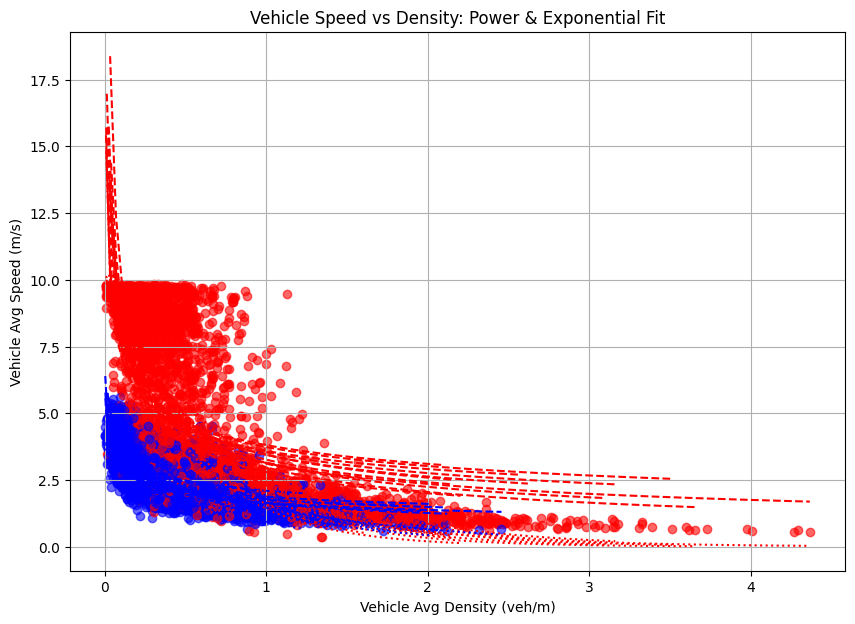

In [31]:
# all in one plot: all combination plot
column_names = df.columns
grouped_columns = [(column_names[i], column_names[i + 1]) for i in range(0, len(column_names), 2)]

fig, ax = plt.subplots(figsize=(10, 7))

for x_col, y_col in grouped_columns:
    label_num = x_col.split("_")[0]
    x = df[x_col].dropna()
    y = df[y_col].dropna()

    if "Hostler" in x_col:
        color = 'b'
        label_prefix = "hostlers"
    elif "Truck" in x_col:
        color = 'r'
        label_prefix = "trucks"
    else:
        continue

    ax.scatter(x, y, label=f"{label_num} {label_prefix}", color=color, alpha=0.6)

    try:
        power_params, _ = curve_fit(power_func, x, y, p0=(1, -1))
        x_fit = np.linspace(min(x), max(x), 100)
        y_power_fit = power_func(x_fit, *power_params)
        ax.plot(x_fit, y_power_fit, color=color, linestyle='--', label=f"{label_prefix} Power Fit ({label_num})")
        print(f"{label_prefix.capitalize()} {label_num} Power Fit: a = {power_params[0]:.4f}, b = {power_params[1]:.4f}")
    except Exception as e:
        print(f"{label_prefix.capitalize()} {label_num} power function fit failed: {e}")

    try:
        exp_params, _ = curve_fit(exp_func, x, y, p0=(1, -0.1))
        y_exp_fit = exp_func(x_fit, *exp_params)
        ax.plot(x_fit, y_exp_fit, color=color, linestyle=':', label=f"{label_prefix} Exp Fit ({label_num})")
        print(f"{label_prefix.capitalize()} {label_num} Exp Fit: a = {exp_params[0]:.4f}, b = {exp_params[1]:.4f}")
    except Exception as e:
        print(f"{label_prefix.capitalize()} {label_num} exponential function fit failed: {e}")

ax.set_xlabel("Vehicle Avg Density (veh/m)")
ax.set_ylabel("Vehicle Avg Speed (m/s)")
ax.set_title("Vehicle Speed vs Density: Power & Exponential Fit")
# ax.legend()
ax.grid(True)


In [32]:
# shape parameters of density-speed function analysis
column_names = df.columns
grouped_columns = [(column_names[i], column_names[i + 1]) for i in range(0, len(column_names), 2)]

fit_results = []

for x_col, y_col in grouped_columns:
    match = re.search(r"intermodal_(\d+)_(\d+)_(\d+)_(\d+)_.*", x_col)
    if not match:
        continue

    row, col, throughput, hostler = map(int, match.groups())

    x = df[x_col].dropna()
    y = df[y_col].dropna()

    if "Hostler" in x_col:
        label_prefix = "Hostlers"
    elif "Truck" in x_col:
        label_prefix = "Trucks"
    else:
        continue

    power_params, exp_params = (None, None)

    try:
        power_params, _ = curve_fit(power_func, x, y, p0=(1, -1))
    except Exception as e:
        power_params = [np.nan, np.nan]

    try:
        exp_params, _ = curve_fit(exp_func, x, y, p0=(1, -0.1))
    except Exception as e:
        exp_params = [np.nan, np.nan]


    fit_results.append({
        "Rows": row,
        "Cols": col,
        "Throughput": throughput,
        "Hostler": hostler,
        "Vehicle Type": label_prefix,
        "Power a": power_params[0],
        "Power b": power_params[1],
        "Exp a": exp_params[0],
        "Exp b": exp_params[1]
    })

fit_results_df = pd.DataFrame(fit_results)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)
print(fit_results_df)

fit_results_df.to_excel("output/same_layout_fitting_results.xlsx", index=False)
print(f"Done!")


    Rows  Cols  Throughput  Hostler Vehicle Type  Power a  Power b   Exp a  \
0      2     2          35       10       Trucks   3.4459  -0.4135 10.6177   
1      2     2          35       10     Hostlers   1.7959  -0.2583  3.7867   
2      2     2          35       15       Trucks   3.1128  -0.4736 10.8158   
3      2     2          35       15     Hostlers   1.6095  -0.2778  3.1467   
4      2     2          35        5       Trucks   2.7960  -0.4833  9.9642   
5      2     2          35        5     Hostlers   2.1232  -0.2258  4.1611   
6      2     2          30       10       Trucks   2.9723  -0.5363 11.0071   
7      2     2          30       10     Hostlers   1.6296  -0.3679  3.3835   
8      2     2          30       15       Trucks   3.1544  -0.4237  9.5166   
9      2     2          30       15     Hostlers   1.7561  -0.2363  3.5280   
10     2     2          30        5       Trucks   3.1381  -0.4447 10.2165   
11     2     2          30        5     Hostlers   2.0155  -0.26

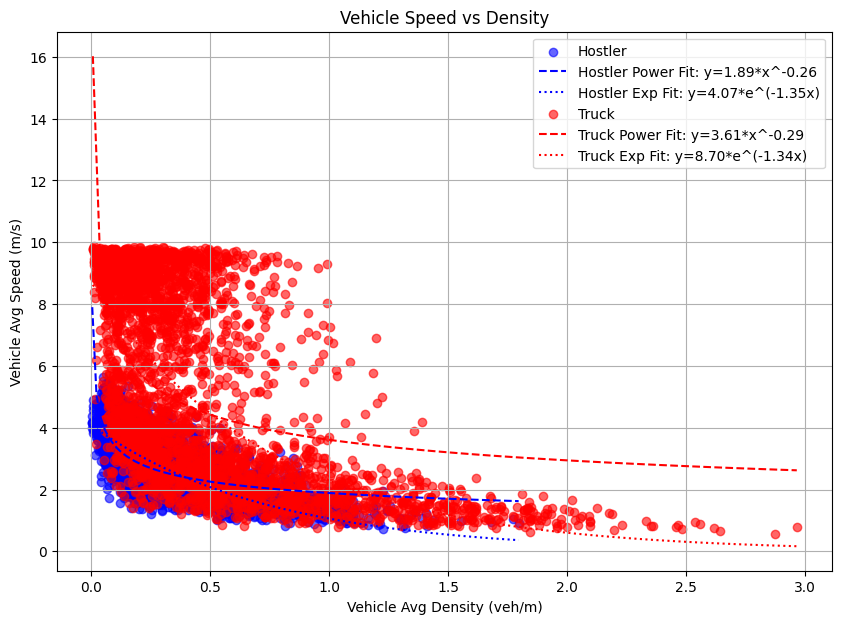

In [4]:
# All in one plot: Fitting in power & exponential function
column_names = df.columns
grouped_columns = [(column_names[i], column_names[i + 1]) for i in range(0, len(column_names), 2)]

def power_func(x, a, b):
    return a * x**b

def exp_func(x, a, b):
    return a * np.exp(b * x)

hostler_x, hostler_y = [], []
truck_x, truck_y = [], []

for x_col, y_col in grouped_columns:
    if "Hostler" in x_col:
        hostler_x.extend(df[x_col].dropna())
        hostler_y.extend(df[y_col].dropna())
    elif "Truck" in x_col:
        truck_x.extend(df[x_col].dropna())
        truck_y.extend(df[y_col].dropna())

hostler_x = np.array(hostler_x)
hostler_y = np.array(hostler_y)
truck_x = np.array(truck_x)
truck_y = np.array(truck_y)

fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(hostler_x, hostler_y, label="Hostler", color='b', alpha=0.6)

try:
    params, _ = curve_fit(power_func, hostler_x, hostler_y, p0=(1, -1))
    x_fit = np.linspace(min(hostler_x), max(hostler_x), 100)
    y_fit = power_func(x_fit, *params)
    ax.plot(x_fit, y_fit, color='b', linestyle='--', label=f"Hostler Power Fit: y={params[0]:.2f}*x^{params[1]:.2f}")
except:
    print("Hostler power fit failed.")

# Hostler Exp Fit
try:
    params, _ = curve_fit(exp_func, hostler_x, hostler_y, p0=(1, -0.1))
    y_fit = exp_func(x_fit, *params)
    ax.plot(x_fit, y_fit, color='b', linestyle=':', label=f"Hostler Exp Fit: y={params[0]:.2f}*e^({params[1]:.2f}x)")
except:
    print("Hostler exponential fit failed.")

ax.scatter(truck_x, truck_y, label="Truck", color='r', alpha=0.6)

try:
    params, _ = curve_fit(power_func, truck_x, truck_y, p0=(1, -1))
    x_fit = np.linspace(min(truck_x), max(truck_x), 100)
    y_fit = power_func(x_fit, *params)
    ax.plot(x_fit, y_fit, color='r', linestyle='--', label=f"Truck Power Fit: y={params[0]:.2f}*x^{params[1]:.2f}")
except:
    print("Truck power fit failed.")

# Truck Exp Fit
try:
    params, _ = curve_fit(exp_func, truck_x, truck_y, p0=(1, -0.1))
    y_fit = exp_func(x_fit, *params)
    ax.plot(x_fit, y_fit, color='r', linestyle=':', label=f"Truck Exp Fit: y={params[0]:.2f}*e^({params[1]:.2f}x)")
except:
    print("Truck exponential fit failed.")

ax.set_xlabel("Vehicle Avg Density (veh/m)")
ax.set_ylabel("Vehicle Avg Speed (m/s)")
ax.set_title("Vehicle Speed vs Density")
ax.legend()
ax.grid(True)

plt.show()

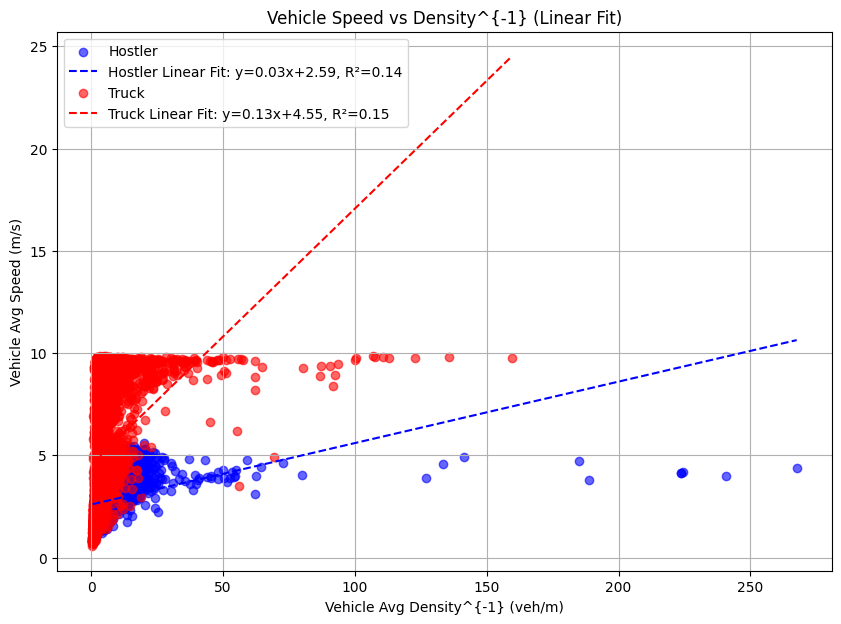

In [5]:
# Linear try
column_names = df.columns
grouped_columns = [(column_names[i], column_names[i + 1]) for i in range(0, len(column_names), 2)]

def linear_func(x, a, b):
    return a * x + b

hostler_x, hostler_y = [], []
truck_x, truck_y = [], []

for x_col, y_col in grouped_columns:
    if "Hostler" in x_col:
        density = df[x_col].dropna()
        hostler_x.extend(1 / density)
        hostler_y.extend(df[y_col].dropna())
    elif "Truck" in x_col:
        density = df[x_col].dropna()
        truck_x.extend(1 / density)
        truck_y.extend(df[y_col].dropna())

hostler_x = np.array(hostler_x)
hostler_y = np.array(hostler_y)
truck_x = np.array(truck_x)
truck_y = np.array(truck_y)

fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(hostler_x, hostler_y, label="Hostler", color='b', alpha=0.6)

# Hostler Linear Fit
try:
    params, _ = curve_fit(linear_func, hostler_x, hostler_y, p0=(1, 1))
    x_fit = np.linspace(min(hostler_x), max(hostler_x), 100)
    y_fit = linear_func(x_fit, *params)
    r2 = r2_score(hostler_y, linear_func(hostler_x, *params))
    ax.plot(x_fit, y_fit, color='b', linestyle='--', label=f"Hostler Linear Fit: y={params[0]:.2f}x+{params[1]:.2f}, R²={r2:.2f}")
except:
    print("Hostler linear fit failed.")

ax.scatter(truck_x, truck_y, label="Truck", color='r', alpha=0.6)

# Truck Linear Fit
try:
    params, _ = curve_fit(linear_func, truck_x, truck_y, p0=(1, 1))
    x_fit = np.linspace(min(truck_x), max(truck_x), 100)
    y_fit = linear_func(x_fit, *params)
    r2 = r2_score(truck_y, linear_func(truck_x, *params))
    ax.plot(x_fit, y_fit, color='r', linestyle='--', label=f"Truck Linear Fit: y={params[0]:.2f}x+{params[1]:.2f}, R²={r2:.2f}")
except:
    print("Truck linear fit failed.")

ax.set_xlabel("Vehicle Avg Density^{-1} (veh/m)")
ax.set_ylabel("Vehicle Avg Speed (m/s)")
ax.set_title("Vehicle Speed vs Density^{-1} (Linear Fit)")
ax.legend()
ax.grid(True)

plt.show()

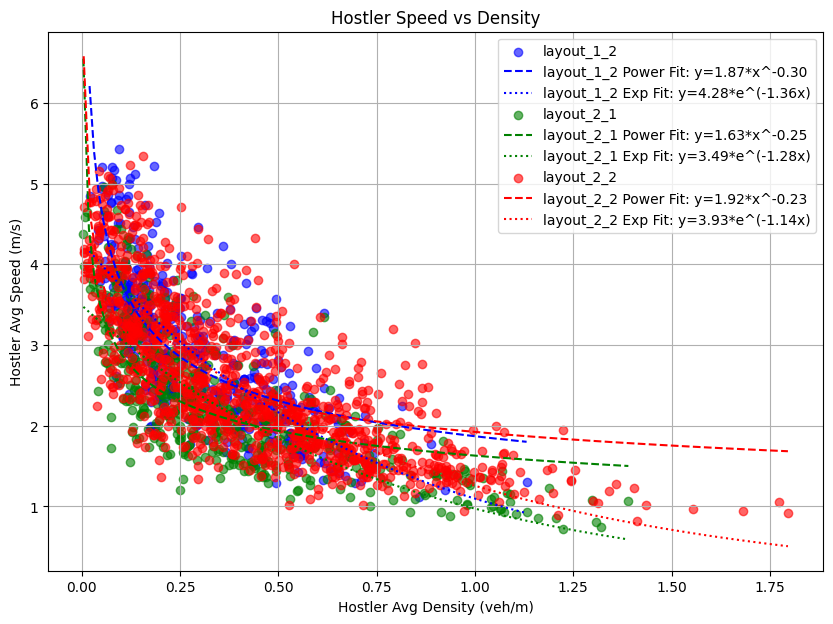

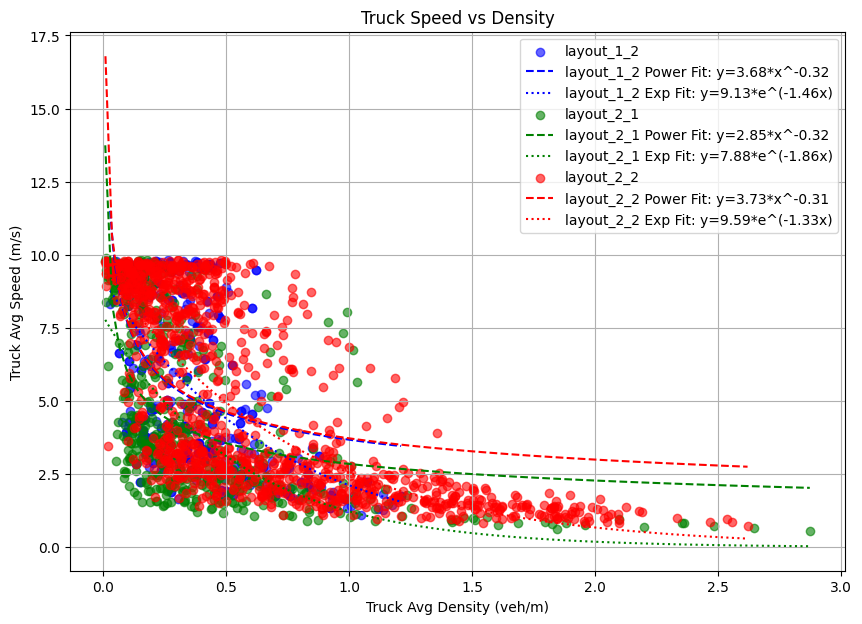

In [34]:
# Group plot

file_names = {
    "layout_1_2": "data/layout_1_2.xlsx",
    "layout_2_1": "data/layout_2_1.xlsx",
    "layout_2_2": "data/layout_2_2.xlsx"
}

colors = {
    "layout_1_2": "b",
    "layout_2_1": "g",
    "layout_2_2": "r"
}

hostler_data = {}
truck_data = {}

for layout, file in file_names.items():
    df = pd.read_excel(file)

    column_names = df.columns
    grouped_columns = [(column_names[i], column_names[i + 1]) for i in range(0, len(column_names), 2)]

    hostler_x, hostler_y = [], []
    truck_x, truck_y = [], []

    for x_col, y_col in grouped_columns:
        if "Hostler" in x_col:
            hostler_x.extend(df[x_col].dropna())
            hostler_y.extend(df[y_col].dropna())
        elif "Truck" in x_col:
            truck_x.extend(df[x_col].dropna())
            truck_y.extend(df[y_col].dropna())

    hostler_data[layout] = (np.array(hostler_x), np.array(hostler_y))
    truck_data[layout] = (np.array(truck_x), np.array(truck_y))

fig, ax = plt.subplots(figsize=(10, 7))

for layout, (x, y) in hostler_data.items():
    ax.scatter(x, y, label=layout, color=colors[layout], alpha=0.6)

    try:
        params, _ = curve_fit(power_func, x, y, p0=(1, -1))
        x_fit = np.linspace(min(x), max(x), 100)
        y_fit = power_func(x_fit, *params)
        ax.plot(x_fit, y_fit, color=colors[layout], linestyle='--',
                label=f"{layout} Power Fit: y={params[0]:.2f}*x^{params[1]:.2f}")
    except:
        print(f"{layout} Hostler power fit failed.")

    try:
        params, _ = curve_fit(exp_func, x, y, p0=(1, -0.1))
        y_fit = exp_func(x_fit, *params)
        ax.plot(x_fit, y_fit, color=colors[layout], linestyle=':',
                label=f"{layout} Exp Fit: y={params[0]:.2f}*e^({params[1]:.2f}x)")
    except:
        print(f"{layout} Hostler exponential fit failed.")

ax.set_xlabel("Hostler Avg Density (veh/m)")
ax.set_ylabel("Hostler Avg Speed (m/s)")
ax.set_title("Hostler Speed vs Density")
ax.legend()
ax.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(10, 7))

for layout, (x, y) in truck_data.items():
    ax.scatter(x, y, label=layout, color=colors[layout], alpha=0.6)

    try:
        params, _ = curve_fit(power_func, x, y, p0=(1, -1))
        x_fit = np.linspace(min(x), max(x), 100)
        y_fit = power_func(x_fit, *params)
        ax.plot(x_fit, y_fit, color=colors[layout], linestyle='--',
                label=f"{layout} Power Fit: y={params[0]:.2f}*x^{params[1]:.2f}")
    except:
        print(f"{layout} Truck power fit failed.")

    try:
        params, _ = curve_fit(exp_func, x, y, p0=(1, -0.1))
        y_fit = exp_func(x_fit, *params)
        ax.plot(x_fit, y_fit, color=colors[layout], linestyle=':',
                label=f"{layout} Exp Fit: y={params[0]:.2f}*e^({params[1]:.2f}x)")
    except:
        print(f"{layout} Truck exponential fit failed.")

ax.set_xlabel("Truck Avg Density (veh/m)")
ax.set_ylabel("Truck Avg Speed (m/s)")
ax.set_title("Truck Speed vs Density")
ax.legend()
ax.grid(True)
plt.show()
